---

# Credit Score prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



# Data Exploration 

In [2]:
df=pd.read_csv('train.csv') 
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
#checking for duplicates 
df.duplicated().sum() 

0

In [5]:
#checking for null values for each column
df.isna().sum() 

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

---

# Preprocessing and feature engineering 
---

In [6]:
#Drop the ID column to avoid data leakage
#Drop Name column as we already have the customer_ID 
df.drop(columns=['Name','ID'], inplace=True)
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Handling_ Null values

In [7]:
df['Customer_ID'].nunique()

12500

### These functions handle the columns with respect to the Customer_ID column with either mode or mean

In [8]:
def handling_columns_mode(value):
    for i in (df['Customer_ID'].unique()):
        customers_list=df[(df['Customer_ID']==i) & (df[value].isnull()) ].index.tolist()
        mode_series=df[df['Customer_ID']==i][value].mode()
        if not mode_series.empty:
            # Get the most frequent value (mode)
            mode_value = mode_series.iloc[0]
            # Fill missing values with the mode value
            df.loc[customers_list, value] = mode_value
        else:
            print("No mode found for Customer_ID")
    

        
        
       
    print('Done-->')   

In [9]:
def handling_columns_mean(value):
    for i in (df['Customer_ID'].unique()):
        customers_list=df[(df['Customer_ID']==i) & (df[value].isnull()) ].index.tolist()
        mean=df[df['Customer_ID']==i][value].mean()
        df.loc[customers_list,value]=mean
       
    print('Done-->')

## <b> Monthly_Inhand_Salary </b>

In [10]:
df[['Occupation','Monthly_Inhand_Salary','Customer_ID']]

,Occupation,Monthly_Inhand_Salary,Customer_ID
0,Scientist,1824.843333,CUS_0xd40
1,Scientist,NaN,CUS_0xd40
2,Scientist,NaN,CUS_0xd40
3,Scientist,NaN,CUS_0xd40
4,Scientist,1824.843333,CUS_0xd40
...,...,...,...
99995,Mechanic,3359.415833,CUS_0x942c
99996,Mechanic,3359.415833,CUS_0x942c
99997,Mechanic,3359.415833,CUS_0x942c
99998,Mechanic,3359.415833,CUS_0x942c


In [11]:
#Handling the column according to the customer_ID that the person has and getting the average salary 
#handling_columns_mean('Monthly_Inhand_Salary') --> the function proposed earlier is not efficient in performance 
# Instead, we use either GROUP_BY or Pivot_table technique

In [12]:
# Step 1: Create a pivot table to find the mean of Amount_invested_monthly for each Customer_ID
mean_df = df.dropna(subset=['Monthly_Inhand_Salary']).pivot_table(values='Monthly_Inhand_Salary', index='Customer_ID', aggfunc='mean').reset_index()

# Step 2: Merge the pivot table back to the original DataFrame
df = df.merge(mean_df, on='Customer_ID', suffixes=('', '_mean'))
# Step 3: Fill NaN values in the original column with the mean values from the pivot table
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary_mean'])
df.drop(columns=['Monthly_Inhand_Salary_mean'], inplace=True)

In [13]:
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Type_of_Loan

In [14]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [15]:
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [16]:
# For Null values it's better to fill it with 'not mentioned' or 'not specified'
df['Type_of_Loan'].fillna('Not Specified',inplace=True)
df['Type_of_Loan'].isna().sum()

0

In [17]:
# For dealing with this column , the importent labels need to  then encode these labels for btter analysis

In [18]:
# Function to clean the loan type strings
def clean_loan_types(loan_string):
    if pd.notna(loan_string):
        loan_string = loan_string.replace('and', '').replace('And', '')
    return loan_string

# Apply cleaning function to the 'Type_of_Loan' column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_loan_types)

# Function to identify unique loan types
def identify_loan_types(df):
    unique_loan_types = set()
    for loan_string in df['Type_of_Loan'].dropna():
        # Split the loan string by commas
        loans = [loan.strip() for loan in loan_string.split(',')]
        unique_loan_types.update(loans)
    return unique_loan_types

# Identify all unique loan types
loan_types = identify_loan_types(df)

# Create new columns for each unique loan type, initialized to 0
for loan_type in loan_types:
    df[loan_type] = 0

# Function to populate loan type columns with 1 or 0
def populate_loan_columns(row):
    if pd.notna(row['Type_of_Loan']):
        # Split the loan string by commas
        loans = set(loan.strip() for loan in row['Type_of_Loan'].split(','))
        for loan_type in loan_types:
            if loan_type in loans:
                row[loan_type] = 1
    return row

# Apply the function to each row
df = df.apply(populate_loan_columns, axis=1)





In [19]:
# Rename columns to strip extra spaces
new_column_names = {col: col.strip() for col in df.columns}
df.rename(columns=new_column_names, inplace=True)


In [20]:
# Drop the 'Type_of_Loan' column as it's no longer needed
df.drop(columns='Type_of_Loan',inplace=True) 
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,1,0,0,0,1,0,1,1,0
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,1,0,0,0,1,0,1,1,0
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,1,0,0,0,1,0,1,1,0
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,1,0,0,0,1,0,1,1,0
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,...,Good,1,0,0,0,1,0,1,1,0


In [21]:
pd.set_option('display.max_columns', None) # For showing all columns
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1,0,0,0,1,0,1,1,0
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,1,0,0,0,1,0,1,1,0
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,1,0,0,0,1,0,1,1,0
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,1,0,0,0,1,0,1,1,0
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,1,0,0,0,1,0,1,1,0


In [22]:
df.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit           0
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
Home Equity Loan               0
Payday Loan                    0
Mortgage Loan                  0
Student Loan                   0
Personal Loan                  0
Debt Conso

# Num_of_Delayed_Payment

In [23]:
df['Num_of_Delayed_Payment'].value_counts()

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [24]:
#replacing null values with any number temporarily just to replace the unexpected values like 848_
df[df['Num_of_Delayed_Payment']=='8888888']
df['Num_of_Delayed_Payment'].fillna('8888888', inplace=True)

In [25]:
df['Num_of_Delayed_Payment'].value_counts()

8888888    7002
19         5327
17         5261
16         5173
10         5153
           ... 
848_          1
4134          1
1530          1
1502          1
2047          1
Name: Num_of_Delayed_Payment, Length: 750, dtype: int64

In [26]:
#Replacing unexpected values like -1,_84, etc
import re
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'\D', '', regex=True)
df[df['Num_of_Delayed_Payment']=='8888888']
df['Num_of_Delayed_Payment'].unique()

array(['7', '8888888', '4', '8', '6', '1', '3', '0', '5', '9', '12', '15',
       '17', '10', '2', '11', '14', '20', '22', '13', '16', '18', '19',
       '23', '24', '21', '3318', '3083', '1338', '26', '3104', '25',
       '183', '1106', '834', '2672', '2008', '538', '27', '3478', '2420',
       '707', '708', '3815', '28', '1867', '2250', '1463', '4126', '2882',
       '1941', '2655', '2628', '132', '3069', '306', '3539', '3684',
       '1823', '4128', '1946', '827', '2297', '2566', '904', '182', '929',
       '3568', '2503', '1552', '2812', '1697', '3764', '851', '3905',
       '923', '88', '1668', '3253', '808', '2689', '3858', '642', '3457',
       '1402', '1732', '3154', '847', '3037', '2204', '3103', '1063',
       '2056', '1282', '1841', '2569', '211', '793', '3484', '411',
       '3491', '2072', '3050', '1049', '2162', '3402', '2753', '1718',
       '1014', '3260', '3855', '84', '2311', '3251', '1832', '4069',
       '3010', '733', '4241', '166', '2461', '1749', '3200', '663',
 

In [27]:
#Checking if is there any value that's non-digit
def has_non_digit_characters(value):
    return bool(re.search(r'\D', value))  # \D matches any non-digit character

#Apply the function to the column and filter rows
non_digit_rows = df[df['Num_of_Delayed_Payment'].apply(has_non_digit_characters)]
non_digit_rows

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified


In [28]:
df['Num_of_Delayed_Payment'].isna().sum()

0

In [29]:
#Convert it to numerical value to handle the temporary value which was null before
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('int64')

In [30]:
# Step 1: Replace the temporary values with null 
df.loc[df['Num_of_Delayed_Payment'] == 8888888 , 'Num_of_Delayed_Payment'] = np.nan

# Step 2: Create a pivot table to find the mode of Num_of_Delayed_Payment for each Customer_ID where Num_of_Delayed_Payment != 8888888
mode_df = df[df['Num_of_Delayed_Payment'] != 8888888 ].pivot_table(values='Num_of_Delayed_Payment', index='Customer_ID', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

# Step 3: Merge the pivot table back to the original DataFrame
df = df.merge(mode_df, on='Customer_ID', suffixes=('', '_mode'))

# Step 4: Fill NaN values in the original column with the mode values from the pivot table
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment_mode'])
df.drop(columns=['Num_of_Delayed_Payment_mode'], inplace=True)


In [31]:
df['Num_of_Delayed_Payment'].value_counts()

19.0      5920
17.0      5795
10.0      5763
16.0      5735
15.0      5667
          ... 
848.0        1
4134.0       1
1530.0       1
1502.0       1
2047.0       1
Name: Num_of_Delayed_Payment, Length: 708, dtype: int64

In [32]:
# Step 1: Handle outliers by putting them into null
df.loc[df['Num_of_Delayed_Payment'] >= 30, 'Num_of_Delayed_Payment'] = np.nan

# Step 2: Create a pivot table to find the mode of Num_of_Delayed_Payment for each Customer_ID
mean_df = df.dropna(subset=['Num_of_Delayed_Payment']).pivot_table(values='Num_of_Delayed_Payment', index='Customer_ID', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

# Step 3: Merge the pivot table back to the original DataFrame
df = df.merge(mean_df, on='Customer_ID', suffixes=('', '_mode'))

# Step 4: Fill NaN values in the original column with the mode values from the pivot table
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment_mode'])

# Drop the mode column as it's no longer needed
df.drop(columns=['Num_of_Delayed_Payment_mode'], inplace=True)

In [33]:
df['Num_of_Delayed_Payment'].unique()

array([ 7.,  4.,  8.,  6.,  1.,  3.,  0.,  5.,  9., 15., 12., 17., 10.,
        2., 11., 14., 20., 22., 13., 16., 19., 18., 21., 23., 24., 26.,
       25., 27., 28.])

In [34]:
df['Num_of_Delayed_Payment'].value_counts()

19.0    5967
17.0    5831
10.0    5813
16.0    5780
15.0    5711
18.0    5669
20.0    5570
12.0    5504
9.0     5410
8.0     5294
11.0    5259
14.0    4502
13.0    4335
21.0    2723
7.0     2537
6.0     2493
22.0    2491
5.0     2267
2.0     2197
23.0    2183
3.0     2165
1.0     2150
4.0     1981
25.0    1853
24.0    1843
0.0     1769
26.0     322
27.0     250
28.0     131
Name: Num_of_Delayed_Payment, dtype: int64

# Num_Credit_Inquiries

In [35]:
df['Num_Credit_Inquiries'].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [36]:
# For this column, there are many values that are considered unrealistic to be reached
# For example the value"1721" it'll be considered as fraud 

In [37]:
# Step 1: Handle outliers by putting them into null
df.loc[df['Num_Credit_Inquiries'] >= 200, 'Num_Credit_Inquiries'] = np.nan

# Step 2: Create a pivot table to find the mean of Num_Credit_Inquiries for each Customer_ID
mean_df = df.dropna(subset=['Num_Credit_Inquiries']).pivot_table(values='Num_Credit_Inquiries', index='Customer_ID', aggfunc='mean').reset_index()

# Step 3: Merge the pivot table back to the original DataFrame
df = df.merge(mean_df, on='Customer_ID', suffixes=('', '_mean'))

# Step 4: Fill NaN values in the original column with the mean values from the pivot table
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries_mean'])

# Drop the mean column as it's no longer needed
df.drop(columns=['Num_Credit_Inquiries_mean'], inplace=True)


In [38]:
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1,0,0,0,1,0,1,1,0
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,1,0,0,0,1,0,1,1,0
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,1,0,0,0,1,0,1,1,0
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,1,0,0,0,1,0,1,1,0
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,1,0,0,0,1,0,1,1,0


In [39]:
df['Num_Credit_Inquiries'].isna().sum()

0

In [40]:
df['Num_Credit_Inquiries'].value_counts()

4.0      11513
3.0       9059
6.0       8243
2.0       8222
7.0       8186
         ...  
171.0        1
45.0         1
189.0        1
101.0        1
74.0         1
Name: Num_Credit_Inquiries, Length: 261, dtype: int64

# Payment_Behaviour

In [41]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [42]:
#Extracting the labels "payment_value" ,"spent_amount" to handle the values like "!@9#%8"
# And for better preprocessing
def split_payment_behaviour(behaviour_str):
    parts = behaviour_str.split('_')
    if len(parts) == 5:
        spent_amount = parts[0]  # 'High' or 'Low'
        payment_value = parts[2]  # 'Small', 'Medium', or 'Large'
        return pd.Series([spent_amount, payment_value])
    else:
        # Handle unexpected format or return NaN values
        return pd.Series([None, None])


In [43]:
df[['spent_amount', 'payment_value']] = df['Payment_Behaviour'].apply(split_payment_behaviour)

In [44]:
df.drop(columns='Payment_Behaviour',inplace=True)
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,312.49408867943663,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,284.62916249607184,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,331.2098628537912,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,223.45130972736786,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,341.48923103222177,Good,1,0,0,0,1,0,1,1,0,High,Medium


In [45]:
df['spent_amount'].fillna('Not Specified',inplace=True)
df['payment_value'].fillna('Not Specified',inplace=True)
df.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Monthly_Balance             1200
Credit_Score                   0
Home Equity Loan               0
Payday Loan                    0
Mortgage Loan                  0
Student Loan                   0
Personal Loan                  0
Debt Consolidation Loan        0
Credit-Bui

# Occupation
    

In [46]:
df.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Monthly_Balance             1200
Credit_Score                   0
Home Equity Loan               0
Payday Loan                    0
Mortgage Loan                  0
Student Loan                   0
Personal Loan                  0
Debt Consolidation Loan        0
Credit-Bui

In [47]:
df['Occupation']=df['Occupation'].str.replace('_______','None')

In [48]:
df['Occupation'].unique()

array(['Scientist', 'None', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [49]:
df[['Num_of_Delayed_Payment','Monthly_Inhand_Salary','Customer_ID']]

,Num_of_Delayed_Payment,Monthly_Inhand_Salary,Customer_ID
0,7.0,1824.843333,CUS_0xd40
1,4.0,1824.843333,CUS_0xd40
2,7.0,1824.843333,CUS_0xd40
3,4.0,1824.843333,CUS_0xd40
4,4.0,1824.843333,CUS_0xd40
...,...,...,...
99995,7.0,3359.415833,CUS_0x942c
99996,7.0,3359.415833,CUS_0x942c
99997,6.0,3359.415833,CUS_0x942c
99998,6.0,3359.415833,CUS_0x942c


# Credit_History_Age_column


In [50]:
df['Credit_History_Age'].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [51]:
df['Credit_History_Age'].isna().sum()

9030

In [52]:
# For handling this column I preferred to handle with the mode of the years of each customer and the month of each transaction 
# Then convert it to numerical value

In [53]:
# Step 2: Create a pivot table to find the mode of Credit_History_Age for each Customer_ID
mode_df = df.dropna(subset=['Credit_History_Age']).pivot_table(values='Credit_History_Age', index='Customer_ID', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

# Step 3: Merge the pivot table back to the original DataFrame
df = df.merge(mode_df, on='Customer_ID', suffixes=('', '_mode'))

# Step 4: Fill NaN values in the original column with the mode values from the pivot table
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age_mode'])
df.drop(columns=['Credit_History_Age_mode'], inplace=True)

In [54]:
df['Credit_History_Age'].isna().sum()

0

In [55]:
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,312.49408867943663,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.28022162236736,284.62916249607184,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,331.2098628537912,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,223.45130972736786,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,341.48923103222177,Good,1,0,0,0,1,0,1,1,0,High,Medium


In [56]:
month_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Convert month names to month numbers
df['Month_num'] = df['Month'].map(month_to_num)

# Function to convert month number to "X Months"
def month_num_to_months(month_num):
    return month_num



In [57]:
# Process rows where 'Credit_History_Age' is a string with only the year
def process_year_only(row):
    if pd.notna(row['Credit_History_Age']) and row['Credit_History_Age'].isdigit():
        year = row['Credit_History_Age']
        month_num = row['Month_num']
        months = month_num_to_months(month_num)
        return f"{year} Years and {months} Months"
    return row['Credit_History_Age']

# Apply the function to handle rows with only the year
df['Credit_History_Age'] = df.apply(process_year_only, axis=1)

# Drop the helper column
df.drop(columns=['Month_num'], inplace=True)

In [58]:
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,312.49408867943663,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.28022162236736,284.62916249607184,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,331.2098628537912,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,223.45130972736786,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,341.48923103222177,Good,1,0,0,0,1,0,1,1,0,High,Medium


In [59]:
df['Credit_History_Age'].isna().sum()

0

In [60]:
df.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Monthly_Balance             1200
Credit_Score                   0
Home Equity Loan               0
Payday Loan                    0
Mortgage Loan                  0
Student Loan                   0
Personal Loan                  0
Debt Consolidation Loan        0
Credit-Bui

In [61]:
def convert_to_years(age_str):
    # Split the string by spaces
    parts = age_str.split()
    
    try:
        # Extract years and months from the split parts
        years = int(parts[0])  # Assumes years are always the first part
        months = int(parts[3]) # Assumes months are always the fourth part
        
        # Convert months to years (12 months = 1 year)
        months_as_years = months / 12
        
        # Calculate total years
        total_years = years + months_as_years
        return total_years
    except (IndexError, ValueError):
        # Handle unexpected format or conversion errors
        return None

In [62]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_years)

In [63]:
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,_,809.98,26.822620,22.083333,No,49.574949,80.41529543900253,312.49408867943663,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,22.083333,No,49.574949,118.28022162236736,284.62916249607184,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,_,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.699521264648,331.2098628537912,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,199.4580743910713,223.45130972736786,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,41.420153086217326,341.48923103222177,Good,1,0,0,0,1,0,1,1,0,High,Medium


In [64]:
df[['Customer_ID','Credit_History_Age']]

,Customer_ID,Credit_History_Age
0,CUS_0xd40,22.083333
1,CUS_0xd40,22.083333
2,CUS_0xd40,22.250000
3,CUS_0xd40,22.333333
4,CUS_0xd40,22.416667
...,...,...
99995,CUS_0x942c,31.500000
99996,CUS_0x942c,31.583333
99997,CUS_0x942c,31.666667
99998,CUS_0x942c,31.750000


In [65]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Home Equity Loan', 'Payday Loan', 'Mortgage Loan', 'Student Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Credit-Builder Loan',
       'Auto Loan', 'Not Specified', 'spent_amount', 'payment_value'],
      dtype='object')

In [66]:
df.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Monthly_Balance             1200
Credit_Score                   0
Home Equity Loan               0
Payday Loan                    0
Mortgage Loan                  0
Student Loan                   0
Personal Loan                  0
Debt Consolidation Loan        0
Credit-Bui

## Amount_invested_monthly

In [67]:
df['Amount_invested_monthly'].value_counts()

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [68]:
# Handling the values like __10000__
df['Amount_invested_monthly'].unique()
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace('_','',regex=False)
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'])

In [69]:
#Handling the null values with mean of each Customer_ID
# Step 1: Create a pivot table to find the mean of Amount_invested_monthly for each Customer_ID
mean_df = df.dropna(subset=['Amount_invested_monthly']).pivot_table(values='Amount_invested_monthly', index='Customer_ID', aggfunc='mean').reset_index()

# Step 2: Merge the pivot table back to the original DataFrame
df = df.merge(mean_df, on='Customer_ID', suffixes=('', '_mean'))
# Step 3: Fill NaN values in the original column with the mean values from the pivot table
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly_mean'])
df.drop(columns=['Amount_invested_monthly_mean'], inplace=True)

In [70]:
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,_,809.98,26.822620,22.083333,No,49.574949,80.415295,312.49408867943663,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,22.083333,No,49.574949,118.280222,284.62916249607184,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,_,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,331.2098628537912,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,223.45130972736786,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,341.48923103222177,Good,1,0,0,0,1,0,1,1,0,High,Medium


In [71]:
df.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Monthly_Balance             1200
Credit_Score                   0
Home Equity Loan               0
Payday Loan                    0
Mortgage Loan                  0
Student Loan                   0
Personal Loan                  0
Debt Consolidation Loan        0
Credit-Bui

# Monthly_Balance

In [72]:
df['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [73]:
df['Monthly_Balance']=df['Monthly_Balance'].str.replace('_','',regex=False)
df['Monthly_Balance']=df['Monthly_Balance'].str.replace('-','',regex=False)


In [74]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [75]:
df['Monthly_Balance'].unique()

array([312.49408868, 284.6291625 , 331.20986285, ..., 448.42640653,
       343.7939996 , 214.61493362])

In [76]:
df['Monthly_Balance'].isna().sum()

2868

In [77]:
df.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,_,809.98,26.822620,22.083333,No,49.574949,80.415295,312.494089,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,22.083333,No,49.574949,118.280222,284.629162,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,_,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,331.209863,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,223.451310,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,341.489231,Good,1,0,0,0,1,0,1,1,0,High,Medium


In [78]:
df['Monthly_Balance'].value_counts()

3.333333e+26    9
3.124941e+02    1
3.531213e+02    1
1.921893e+02    1
2.514739e+02    1
               ..
3.297982e+02    1
2.186369e+02    1
2.465517e+02    1
3.548036e+02    1
2.146149e+02    1
Name: Monthly_Balance, Length: 97124, dtype: int64

In [79]:
# Step 1: Create a pivot table to find the mean of Monthly_Balance for each Customer_ID
mean_df = df.dropna(subset=['Monthly_Balance']).pivot_table(values='Monthly_Balance', index='Customer_ID', aggfunc='mean').reset_index()

# Step 2: Merge the pivot table back to the original DataFrame
df = df.merge(mean_df, on='Customer_ID', suffixes=('', '_mean'))
# Step 3: Fill NaN values in the original column with the mean values from the pivot table
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance_mean'])
df.drop(columns=['Monthly_Balance_mean'], inplace=True)

In [80]:
df.isna().sum() 

Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Home Equity Loan            0
Payday Loan                 0
Mortgage Loan               0
Student Loan                0
Personal Loan               0
Debt Consolidation Loan     0
Credit-Builder Loan         0
Auto Loan                   0
Not Specified               0
spent_amou

In [81]:
df['Monthly_Balance'].value_counts()

3.333333e+26    9
2.615660e+02    5
1.641197e+02    4
3.497672e+02    4
2.151815e+02    4
               ..
2.713295e+02    1
1.774800e+02    1
2.745486e+02    1
2.903567e+02    1
2.146149e+02    1
Name: Monthly_Balance, Length: 98061, dtype: int64

# Outstanding_Debt

In [82]:
df['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '2382.35', '942.59', '599.4'],
      dtype=object)

In [83]:
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace('_','',regex=False)
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace('-','',regex=False)
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

In [84]:
df['Outstanding_Debt'].value_counts()

1109.03    24
1360.45    24
1151.70    24
460.46     24
1172.87    16
           ..
476.37      8
781.45      8
2596.08     8
2543.89     8
599.40      8
Name: Outstanding_Debt, Length: 12001, dtype: int64

# Age

In [85]:
df['Age'].value_counts()

28      2767
26      2761
38      2751
31      2748
25      2695
        ... 
1402       1
4214       1
471        1
4244       1
598        1
Name: Age, Length: 1756, dtype: int64

In [86]:
df['Age']=df['Age'].str.replace('_','',regex=False)
df['Age']=df['Age'].str.replace('-','',regex=False)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].unique()

array([  23,  500,   28, ..., 3904,  333,  598], dtype=int64)

In [87]:
pd.set_option('display.max_rows', None)

In [88]:
df['Age'].value_counts()

26      2914
28      2904
38      2904
31      2892
32      2825
35      2821
36      2819
25      2818
39      2789
27      2786
41      2775
34      2752
19      2750
44      2746
22      2736
20      2711
37      2711
43      2693
30      2693
21      2688
29      2688
24      2647
23      2597
45      2587
42      2541
40      2534
33      2500
18      2339
46      1612
15      1574
17      1469
16      1441
48      1381
55      1358
52      1346
49      1339
53      1329
54      1290
51      1278
50      1255
47      1202
14      1175
500      875
56       362
6799       4
532        3
3640       3
3439       3
2109       3
4307       3
4083       3
95         3
2650       3
6381       3
2756       3
1695       3
2980       3
5579       3
8015       3
1692       3
2546       3
4494       3
3920       3
8279       2
6463       2
5970       2
5714       2
7705       2
3004       2
3861       2
8616       2
1188       2
3385       2
7715       2
3578       2
1512       2
7610       2

In [89]:
df['Age'] = df['Age'].apply(lambda x: np.nan if (x > 80 or x < 18) else x) # we will have huge number of nulls as the age column has so many unrealisstic values aka outliers

In [90]:
# Step 1: Create a pivot table to find the mode of Age for each Customer_ID
mode_df = df.dropna(subset=['Age']).pivot_table(values='Age', index='Customer_ID', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

# Step 2: Merge the pivot table back to the original DataFrame
df = df.merge(mode_df, on='Customer_ID', suffixes=('', '_mode'))

# Step 3: Fill NaN values in the original column with the mode values from the pivot table
df['Age'] = df['Age'].fillna(df['Age_mode'])
df.drop(columns=['Age_mode'], inplace=True)

In [91]:
df['Age'].value_counts()

26.0    3000
28.0    2983
38.0    2978
31.0    2971
25.0    2911
32.0    2909
36.0    2905
35.0    2890
39.0    2871
27.0    2865
41.0    2851
22.0    2842
34.0    2832
19.0    2822
44.0    2817
20.0    2806
37.0    2800
30.0    2775
43.0    2771
29.0    2770
21.0    2760
18.0    2753
24.0    2714
23.0    2667
45.0    2656
40.0    2613
42.0    2610
33.0    2581
46.0    1663
48.0    1421
55.0    1390
52.0    1377
49.0    1376
53.0    1371
51.0    1318
54.0    1316
50.0    1285
47.0    1228
56.0     372
Name: Age, dtype: int64

In [92]:
df['Age'].max()

56.0

In [93]:
df['Age'].isna().sum()

0

In [94]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Home Equity Loan', 'Payday Loan', 'Mortgage Loan', 'Student Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Credit-Builder Loan',
       'Auto Loan', 'Not Specified', 'spent_amount', 'payment_value'],
      dtype='object')

# Delay_from_due_date

In [95]:
df['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 45, 59, 55, 56, 62, 65, 64,
       54, 67, 50, 36, 41, 57, 39, 44, 42, 33, 35, 38, -3, 60, 63, 40, 32,
       37, -5, 58, -4, 66], dtype=int64)

In [96]:
df['Delay_from_due_date']=df['Delay_from_due_date'].apply(abs)

df['Delay_from_due_date'].unique()

array([ 3,  1,  5,  6,  8,  7, 13, 10,  0,  4,  9, 12, 11, 30, 31, 34, 27,
       14,  2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26, 43, 28,
       25, 20, 47, 46, 49, 24, 61, 29, 45, 59, 55, 56, 62, 65, 64, 54, 67,
       50, 36, 41, 57, 39, 44, 42, 33, 35, 38, 60, 63, 40, 32, 37, 58, 66],
      dtype=int64)

In [97]:
df.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Home Equity Loan            0
Payday Loan                 0
Mortgage Loan               0
Student Loan                0
Personal Loan               0
Debt Consolidation Loan     0
Credit-Builder Loan         0
Auto Loan                   0
Not Specified               0
spent_amou

# ID columns

In [98]:
# Customer_ID and SSN are both unique identifiers for the customer except that SSN is used in a wide region not just this bank 
# We only need one of them and the other will be considered as redundant information 
# I used Customer_ID column as it doesn't have undefined values unlike SSN which had values like @#F!_ 

In [99]:
pd.reset_option('display.max_rows')

In [100]:
df[['Customer_ID','SSN']]

,Customer_ID,SSN
0,CUS_0xd40,821-00-0265
1,CUS_0xd40,821-00-0265
2,CUS_0xd40,821-00-0265
3,CUS_0xd40,821-00-0265
4,CUS_0xd40,821-00-0265
...,...,...
92835,CUS_0x9d41,979-38-2855
92836,CUS_0x9d41,979-38-2855
92837,CUS_0x9d41,979-38-2855
92838,CUS_0x9d41,979-38-2855


In [101]:
df['Customer_ID'].value_counts()

CUS_0xd40     8
CUS_0x1758    8
CUS_0xdc8     8
CUS_0xbc03    8
CUS_0x7c25    8
             ..
CUS_0x8880    8
CUS_0x6d0e    8
CUS_0xb7c7    8
CUS_0x5e29    8
CUS_0x9d41    8
Name: Customer_ID, Length: 11605, dtype: int64

In [102]:
df['SSN'].value_counts()

#F%$D@*&8      5162
979-38-2855       8
008-61-0141       8
922-25-7734       8
824-84-8056       8
               ... 
604-62-6133       4
838-33-4811       4
331-28-1921       4
642-73-7670       4
286-44-9634       4
Name: SSN, Length: 11606, dtype: int64

In [103]:
df.drop(columns=['SSN'],inplace=True)
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,_,809.98,26.822620,22.083333,No,49.574949,80.415295,312.494089,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3,4,3,4,1,4.0,11.27,4.0,Good,809.98,31.944960,22.083333,No,49.574949,118.280222,284.629162,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,March,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,_,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,331.209863,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,223.451310,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,341.489231,Good,1,0,0,0,1,0,1,1,0,High,Medium


# Num_Bank_Accounts

> In this column we have some unrealistic values of the number , and the realistic limit of accounts is in the range of 10 accounts otherwise it will be considered as fraud

In [104]:
df['Num_Bank_Accounts'].value_counts()

6       11745
7       11602
4       11575
8       11535
5       11397
        ...  
583         1
1695        1
726         1
987         1
1544        1
Name: Num_Bank_Accounts, Length: 900, dtype: int64

In [105]:
df['Num_Bank_Accounts']=df['Num_Bank_Accounts'].apply(abs)

df['Num_Bank_Accounts'].unique()

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,  889,
       1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429, 1332,
       1588,  120, 1777, 1096,  494, 1139,  831, 1613,  741,  121,  665,
       1748, 1644,  823, 1356, 1651,   87,  711,  450,  210, 1671, 1722,
        648,  672, 1662, 1495,  510,  666,  429, 1131,  980, 1026,  526,
        718, 1300, 1312, 1315,  501, 1566,  480, 1042, 1016,  333, 1265,
        791,  427,  563,  905, 1190, 1036, 1611,  619,  555, 1769,  280,
        752, 1201,  812, 1487,  222,  212, 1019, 1222,  610, 1714, 1308,
       1158, 1115, 1616,  754, 1601,  797, 1577,  521,  703,  933,  959,
        809, 1089, 1656, 1113, 1715,  964, 1533, 1789,  871,  434, 1295,
        565, 1724,  603,  677,  541,  698, 1101,  464, 1539, 1462, 1011,
       1257, 1727,   45, 1266,  897,  535,  484,  331,  675,  826,  946,
       1675,  105, 1327,  845,  549,  473,  710,  5

In [106]:
df['Num_Bank_Accounts'].max()

1798

In [107]:
df['Num_Bank_Accounts'].mode()

0    6
Name: Num_Bank_Accounts, dtype: int64

In [108]:
filtered_df = df[df['Num_Bank_Accounts'] >= 11]
filtered_df['Num_Bank_Accounts'].value_counts()

11      9
803     6
1668    5
791     5
105     5
       ..
583     1
1695    1
726     1
987     1
1544    1
Name: Num_Bank_Accounts, Length: 888, dtype: int64

In [109]:
# Step 1: Replace values in Num_Bank_Accounts >= 11 or == 0 with NaN
df.loc[(df['Num_Bank_Accounts'] >= 11) | (df['Num_Bank_Accounts'] == 0), 'Num_Bank_Accounts'] = np.nan

# Step 2: Create a pivot table to find the mode of Num_Bank_Accounts for each Customer_ID where Num_Bank_Accounts < 11 and != 0
mode_df = df[(df['Num_Bank_Accounts'] < 11) & (df['Num_Bank_Accounts'] != 0)].pivot_table(values='Num_Bank_Accounts', index='Customer_ID', 
                 aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

# Step 3: Merge the pivot table back to the original DataFrame
df = df.merge(mode_df, on='Customer_ID', suffixes=('', '_mode'))

# Step 4: Fill NaN values in the original column with the mode values from the pivot table
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts_mode'])

# Drop the extra column created during the merge
df.drop(columns=['Num_Bank_Accounts_mode'], inplace=True)


In [110]:
filtered_df = df[df['Num_Bank_Accounts'] >= 11]
filtered_df['Num_Bank_Accounts'].value_counts()

Series([], Name: Num_Bank_Accounts, dtype: int64)

In [111]:
df['Num_Bank_Accounts'].value_counts()

6.0     11913
7.0     11757
4.0     11726
8.0     11695
5.0     11568
3.0     11491
9.0      4913
10.0     4738
1.0      4564
2.0      4235
Name: Num_Bank_Accounts, dtype: int64

In [112]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,3,7.0,11.27,4.0,_,809.98,26.822620,22.083333,No,49.574949,80.415295,312.494089,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,1,4.0,11.27,4.0,Good,809.98,31.944960,22.083333,No,49.574949,118.280222,284.629162,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,March,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,3,7.0,_,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,331.209863,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,223.451310,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,341.489231,Good,1,0,0,0,1,0,1,1,0,High,Medium


# Num_Credit_Card

In [113]:
df['Num_Credit_Card'].value_counts()

5       16216
6       14930
7       14766
4       12478
3       11831
        ...  
1219        1
1301        1
682         1
1115        1
699         1
Name: Num_Credit_Card, Length: 1114, dtype: int64

In [114]:
# Step 1: Replace values in Num_Credit_Card >= 11 or == 0 with NaN
df.loc[(df['Num_Credit_Card'] >= 11) | (df['Num_Credit_Card'] == 0), 'Num_Credit_Card'] = np.nan

# Step 2: Create a pivot table to find the mode of Num_Credit_Card for each Customer_ID where Num_Credit_Card < 11 and != 0
mode_df = df[(df['Num_Credit_Card'] < 11) & (df['Num_Credit_Card'] != 0)] \
    .pivot_table(values='Num_Credit_Card', index='Customer_ID', 
                 aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

# Step 3: Merge the pivot table back to the original DataFrame
df = df.merge(mode_df, on='Customer_ID', suffixes=('', '_mode'))

# Step 4: Fill NaN values in the original column with the mode values from the pivot table
df['Num_Credit_Card'] = df['Num_Credit_Card'].fillna(df['Num_Credit_Card_mode'])

# Drop the extra column created during the merge
df.drop(columns=['Num_Credit_Card_mode'], inplace=True)


In [115]:
filtered_df = df[df['Num_Credit_Card'] >= 11]
filtered_df['Num_Credit_Card'].value_counts()

Series([], Name: Num_Credit_Card, dtype: int64)

In [116]:
df['Num_Credit_Card'].value_counts()

5.0     16600
6.0     15277
7.0     15120
4.0     12777
3.0     12082
8.0      4588
10.0     4265
9.0      4194
2.0      1858
1.0      1839
Name: Num_Credit_Card, dtype: int64

# Interest_Rate

In [117]:
df['Interest_Rate'].value_counts()

8       4374
5       4292
6       4126
12      4072
7       4071
        ... 
2548       1
967        1
3790       1
3782       1
1426       1
Name: Interest_Rate, Length: 1573, dtype: int64

In [118]:
# As the others, I remove the values that's greater than the realistic values

In [119]:
# Step 1: Replace values in Interest_Rate >= 34 with NaN
df.loc[df['Interest_Rate'] >= 34, 'Interest_Rate'] = np.nan

# Step 2: Create a pivot table to find the mode of Interest_Rate for each Customer_ID where Interest_Rate < 34
mode_df = df[df['Interest_Rate'] < 34].pivot_table(values='Interest_Rate', index='Customer_ID', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

# Step 3: Merge the pivot table back to the original DataFrame
df = df.merge(mode_df, on='Customer_ID', suffixes=('', '_mode'))

# Step 4: Fill NaN values in the original column with the mode values from the pivot table
df['Interest_Rate'] = df['Interest_Rate'].fillna(df['Interest_Rate_mode'])
df.drop(columns=['Interest_Rate_mode'], inplace=True)


In [120]:
filtered_df = df[df['Interest_Rate'] >= 34]
filtered_df['Interest_Rate'].value_counts()

Series([], Name: Interest_Rate, dtype: int64)

In [121]:
df['Interest_Rate'].value_counts()

8.0     4448
5.0     4392
6.0     4224
12.0    4168
7.0     4152
10.0    4112
9.0     4088
11.0    3976
15.0    3752
18.0    3752
20.0    3616
17.0    3496
19.0    3464
16.0    3392
3.0     2392
1.0     2344
4.0     2256
13.0    2144
2.0     2112
14.0    2096
22.0    1592
23.0    1576
32.0    1544
24.0    1536
30.0    1480
27.0    1448
28.0    1440
29.0    1432
21.0    1416
26.0    1400
25.0    1400
33.0    1296
31.0    1296
Name: Interest_Rate, dtype: int64

# Num_of_Loan

In [122]:
df['Num_of_Loan'].value_counts()


3       12623
4       12549
2       12547
0        9220
1        9037
        ...  
392         1
1015        1
198         1
1151        1
83          1
Name: Num_of_Loan, Length: 380, dtype: int64

In [123]:
df['Num_of_Loan']=df['Num_of_Loan'].str.replace('_','',regex=False)
df['Num_of_Loan']=df['Num_of_Loan'].str.replace('-','',regex=False)
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'])
df['Num_of_Loan'].unique()

array([   4,    1,    3,  967,  100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352,  472, 1017,  945,  146,  563,  341,  444,
        720, 1485,   49,  737, 1106,  466,  728,  313,  843,  617,  119,
        663,  640,   92, 1019,  501, 1302,   39,  716,  848,  931,  424,
       1110, 1152,  457, 1433, 1187,   52, 1480, 1047, 1035, 1347,   33,
        193,  699,  329, 1451,  484,  132,  649,  995,  545,  684, 1135,
       1094, 1204,  654,   58,  348,  614,  323, 1406,  430, 1461,  905,
       1312, 1424, 1154,   95, 1353, 1228,  819, 1006,  359, 1209,  590,
        696, 1185, 1465,  911,   70, 1369,  143, 1416, 1096, 1474,  420,
       1131,  904,   89, 1259,  527, 1241,  449,  418,   23,  238,  638,
        138,  235,  280, 1070, 1484,  494, 1459,  404, 1354, 1495, 1391,
        601, 1313, 1319,  898,  231,  752,  174,  961, 1046,  834,  284,
        438,  288, 1463, 1151,  198, 1015,  855,  392, 1444,  103, 1320,
        745,  172,  252,  630,  241,   31,  405, 12

In [124]:
# Step 1: Replace values in Num_of_Loan >= 10 with NaN
df.loc[df['Num_of_Loan'] >= 10, 'Num_of_Loan'] = np.nan

# Step 2: Create a pivot table to find the mode of Num_of_Loan for each Customer_ID where Num_of_Loan < 10
mode_df = df[df['Num_of_Loan'] < 10].pivot_table(values='Num_of_Loan', index='Customer_ID', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

# Step 3: Merge the pivot table back to the original DataFrame
df = df.merge(mode_df, on='Customer_ID', suffixes=('', '_mode'))

# Step 4: Fill NaN values in the original column with the mode values from the pivot table
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan_mode'])
df.drop(columns=['Num_of_Loan_mode'], inplace=True)


In [125]:
filtered_df = df[df['Num_of_Loan'] >= 10]
filtered_df['Num_of_Loan'].value_counts()

Series([], Name: Num_of_Loan, dtype: int64)

In [126]:
df['Num_of_Loan'].isna().sum()

0

In [127]:
df['Num_of_Loan'].max()

9.0

# Changed_Credit_Limit

In [128]:
df['Changed_Credit_Limit'].value_counts()

_                     1827
8.22                   125
11.32                  120
10.06                  120
7.35                   115
                      ... 
3.0500000000000007       1
32.43                    1
31.43                    1
21.01                    1
1.7799999999999998       1
Name: Changed_Credit_Limit, Length: 4276, dtype: int64

In [129]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].str.replace('_','0',regex=False)
df['Changed_Credit_Limit'].value_counts()

0                     1827
8.22                   125
11.32                  120
10.06                  120
7.35                   115
                      ... 
3.0500000000000007       1
32.43                    1
31.43                    1
21.01                    1
1.7799999999999998       1
Name: Changed_Credit_Limit, Length: 4276, dtype: int64

In [130]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].str.replace('-','',regex=False)
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'])

In [131]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].round(2)
df['Changed_Credit_Limit'].value_counts()

0.00     1830
8.22      127
11.32     120
10.06     120
7.35      115
         ... 
31.04       1
21.79       1
30.10       1
30.89       1
27.39       1
Name: Changed_Credit_Limit, Length: 3057, dtype: int64

# Credit_Mix

In [132]:
df['Credit_Mix'].value_counts()

Standard    33166
Good        20530
_           17638
Bad         15898
Name: Credit_Mix, dtype: int64

In [133]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

In [134]:
# Step 1: Create a pivot table to find the mode of Credit_Mix for each Customer_ID
mode_df = df.dropna(subset=['Credit_Mix']).pivot_table(values='Credit_Mix', index='Customer_ID', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

# Step 2: Merge the pivot table back to the original DataFrame
df = df.merge(mode_df, on='Customer_ID', suffixes=('', '_mode'))

# Step 3: Fill NaN values in the original column with the mode values from the pivot table
df['Credit_Mix'] = df['Credit_Mix'].fillna(df['Credit_Mix_mode'])
df.drop(columns=['Credit_Mix_mode'], inplace=True)

In [135]:
df['Credit_Mix'].value_counts()

Standard    41704
Good        25624
Bad         19904
Name: Credit_Mix, dtype: int64

In [136]:
df['Credit_Mix'].isna().sum()

0

# Credit_Utilization_Ratio

In [137]:
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].round(2)
df['Credit_Utilization_Ratio'].value_counts()

36.70    78
29.13    77
31.05    75
32.52    75
33.16    74
         ..
47.64     1
44.34     1
21.43     1
44.57     1
44.02     1
Name: Credit_Utilization_Ratio, Length: 2453, dtype: int64

In [138]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,26.82,22.083333,No,49.574949,80.415295,312.494089,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,1,4.0,11.27,4.0,Good,809.98,31.94,22.083333,No,49.574949,118.280222,284.629162,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,0.00,4.0,Good,809.98,28.61,22.250000,No,49.574949,81.699521,331.209863,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,6.27,4.0,Good,809.98,31.38,22.333333,No,49.574949,199.458074,223.451310,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,11.27,4.0,Good,809.98,24.80,22.416667,No,49.574949,41.420153,341.489231,Good,1,0,0,0,1,0,1,1,0,High,Medium


In [139]:
df['Payment_of_Min_Amount'].value_counts()

Yes    45443
No     31297
NM     10492
Name: Payment_of_Min_Amount, dtype: int64

# Total_EMI_per_month

In [140]:
df['Total_EMI_per_month'].value_counts()

0.000000        9480
49.574949          8
150.262787         8
89.800893          8
16.483566          8
                ... 
42827.000000       1
12635.000000       1
65617.000000       1
61873.000000       1
12678.000000       1
Name: Total_EMI_per_month, Length: 12996, dtype: int64

In [141]:
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].round(3)
df['Total_EMI_per_month'].value_counts()

0.000        9480
61.099         24
75.002         23
109.075        22
28.411         16
             ... 
71430.000       1
68635.000       1
24995.000       1
16162.000       1
69885.000       1
Name: Total_EMI_per_month, Length: 12758, dtype: int64

In [142]:
# Step 1: Replace values in Total_EMI_per_month >= 500 with NaN
df.loc[df['Total_EMI_per_month'] >= 500, 'Total_EMI_per_month'] = np.nan

# Step 2: Create a pivot table to find the mean of Total_EMI_per_month for each Customer_ID where Total_EMI_per_month < 500
mean_df = df.pivot_table(values='Total_EMI_per_month', index='Customer_ID', aggfunc='mean').reset_index()
mean_df.columns = ['Customer_ID', 'Total_EMI_per_month_mean']

# Step 3: Merge the pivot table back to the original DataFrame
df = df.merge(mean_df, on='Customer_ID', how='left')

# Step 4: Fill NaN values in the original column with the mean values from the pivot table
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].fillna(df['Total_EMI_per_month_mean'])

# Step 5: Drop the mean column as it's no longer needed
df.drop(columns=['Total_EMI_per_month_mean'], inplace=True)

In [143]:
df['Total_EMI_per_month'].value_counts()

0.000000      9954
61.099000       24
75.002000       24
109.075000      24
30.474000       16
              ... 
224.427286       1
348.673000       1
45.804000        1
85.983000        1
144.179000       1
Name: Total_EMI_per_month, Length: 10151, dtype: int64

In [144]:
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].round(3)
df['Total_EMI_per_month'].value_counts()

0.000      9954
75.002       24
109.075      24
61.099       24
37.733       16
           ... 
121.230       1
94.269        1
144.179       1
320.505       1
117.691       1
Name: Total_EMI_per_month, Length: 9924, dtype: int64

In [145]:
df.isna().sum()

Customer_ID                   0
Month                         0
Age                           0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary         0
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Changed_Credit_Limit          0
Num_Credit_Inquiries          0
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month         216
Amount_invested_monthly       0
Monthly_Balance               0
Credit_Score                  0
Home Equity Loan              0
Payday Loan                   0
Mortgage Loan                 0
Student Loan                  0
Personal Loan                 0
Debt Consolidation Loan       0
Credit-Builder Loan           0
Auto Loan                     0
Not Spec

In [146]:
df=df.dropna()

In [147]:
df.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Home Equity Loan            0
Payday Loan                 0
Mortgage Loan               0
Student Loan                0
Personal Loan               0
Debt Consolidation Loan     0
Credit-Builder Loan         0
Auto Loan                   0
Not Specified               0
spent_amount                0
payment_va

# Amount_invested_monthly

In [148]:
df['Amount_invested_monthly'].value_counts()

10000.000000    3762
0.000000         139
104.671919         5
268.539171         5
169.466147         4
                ... 
142.446883         1
336.531382         1
96.003212          1
51.910308          1
165.397552         1
Name: Amount_invested_monthly, Length: 82555, dtype: int64

In [149]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].round(3)
df['Amount_invested_monthly'].value_counts()

10000.000    3762
0.000         139
104.672         6
112.738         5
119.992         5
             ... 
558.858         1
178.655         1
594.773         1
73.358          1
165.398         1
Name: Amount_invested_monthly, Length: 73656, dtype: int64

In [150]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,26.82,22.083333,No,49.575,80.415,312.494089,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,1,4.0,11.27,4.0,Good,809.98,31.94,22.083333,No,49.575,118.280,284.629162,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,0.00,4.0,Good,809.98,28.61,22.250000,No,49.575,81.700,331.209863,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,6.27,4.0,Good,809.98,31.38,22.333333,No,49.575,199.458,223.451310,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,11.27,4.0,Good,809.98,24.80,22.416667,No,49.575,41.420,341.489231,Good,1,0,0,0,1,0,1,1,0,High,Medium


In [151]:
df['Credit_Score'].value_counts()

Standard    47216
Poor        24377
Good        15423
Name: Credit_Score, dtype: int64

In [152]:
df.drop(columns=['Month'],inplace=True)
df.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,26.82,22.083333,No,49.575,80.415,312.494089,Good,1,0,0,0,1,0,1,1,0,High,Small
1,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,1,4.0,11.27,4.0,Good,809.98,31.94,22.083333,No,49.575,118.280,284.629162,Good,1,0,0,0,1,0,1,1,0,Low,Large
2,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,0.00,4.0,Good,809.98,28.61,22.250000,No,49.575,81.700,331.209863,Good,1,0,0,0,1,0,1,1,0,Low,Medium
3,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,6.27,4.0,Good,809.98,31.38,22.333333,No,49.575,199.458,223.451310,Good,1,0,0,0,1,0,1,1,0,Low,Small
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,11.27,4.0,Good,809.98,24.80,22.416667,No,49.575,41.420,341.489231,Good,1,0,0,0,1,0,1,1,0,High,Medium


# Annual_Income

In [153]:
df['Annual_Income']=df['Annual_Income'].str.replace('_','',regex=False)
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'])


In [154]:
df['Annual_Income']=df['Annual_Income'].round(3)

In [155]:
df['Annual_Income'].value_counts()

17816.75       16
40341.16       16
36585.12       16
109945.32      16
9141.63        16
               ..
2093173.00      1
12862489.00     1
12423868.00     1
11919831.00     1
21367283.00     1
Name: Annual_Income, Length: 11733, dtype: int64

In [156]:
df.isna().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Home Equity Loan            0
Payday Loan                 0
Mortgage Loan               0
Student Loan                0
Personal Loan               0
Debt Consolidation Loan     0
Credit-Builder Loan         0
Auto Loan                   0
Not Specified               0
spent_amount                0
payment_value               0
dtype: int

In [157]:
df['Occupation'].unique()

array(['Scientist', 'None', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [158]:
for i in df.columns:
    print(i)
    print("---")
    print(df[i].value_counts())
    print("--")

Customer_ID
---
CUS_0xd40     8
CUS_0x691     8
CUS_0xaf9c    8
CUS_0x43d0    8
CUS_0xdc8     8
             ..
CUS_0x26fd    8
CUS_0xb3e3    8
CUS_0x3215    8
CUS_0x44e     8
CUS_0xa407    8
Name: Customer_ID, Length: 10877, dtype: int64
--
Age
---
28.0    2837
38.0    2822
26.0    2793
31.0    2755
25.0    2754
36.0    2751
35.0    2729
32.0    2703
39.0    2702
22.0    2685
30.0    2670
41.0    2669
44.0    2662
37.0    2655
27.0    2651
20.0    2650
19.0    2647
34.0    2644
21.0    2635
18.0    2622
43.0    2619
24.0    2593
23.0    2562
29.0    2551
45.0    2544
40.0    2451
33.0    2419
42.0    2402
46.0    1565
52.0    1313
55.0    1264
48.0    1258
49.0    1255
53.0    1242
50.0    1179
51.0    1177
54.0    1168
47.0    1089
56.0     329
Name: Age, dtype: int64
--
Occupation
---
None             6141
Lawyer           5674
Architect        5624
Engineer         5492
Developer        5464
Scientist        5462
Accountant       5458
Media_Manager    5432
Journalist       5421
Mec

In [159]:
# Encoding for 'spent_amount'
spent_amount_mapping = {'Low': 1, 'High': 2, 'Not Specified': 0}
df['spent_amount'] = df['spent_amount'].map(spent_amount_mapping)

# Encoding for 'payment_value'
payment_value_mapping = {'Small': 1, 'Medium': 2, 'Large': 3,'Not Specified': 0}
df['payment_value'] = df['payment_value'].map(payment_value_mapping)

In [160]:
df.isna().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Home Equity Loan            0
Payday Loan                 0
Mortgage Loan               0
Student Loan                0
Personal Loan               0
Debt Consolidation Loan     0
Credit-Builder Loan         0
Auto Loan                   0
Not Specified               0
spent_amount                0
payment_value               0
dtype: int

---


# <b> Splitting data </b>

In [161]:
#Encoding the Customer_ID using label encoder
from sklearn.preprocessing import LabelEncoder
X=df.drop(columns=['Credit_Score'])
y=df['Credit_Score']
le=LabelEncoder()
X['Customer_ID']=le.fit_transform(X['Customer_ID'])
X.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
0,10727,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,26.82,22.083333,No,49.575,80.415,312.494089,1,0,0,0,1,0,1,1,0,2,1
1,10727,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,1,4.0,11.27,4.0,Good,809.98,31.94,22.083333,No,49.575,118.280,284.629162,1,0,0,0,1,0,1,1,0,1,3
2,10727,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,0.00,4.0,Good,809.98,28.61,22.250000,No,49.575,81.700,331.209863,1,0,0,0,1,0,1,1,0,1,2
3,10727,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,6.27,4.0,Good,809.98,31.38,22.333333,No,49.575,199.458,223.451310,1,0,0,0,1,0,1,1,0,1,1
4,10727,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,11.27,4.0,Good,809.98,24.80,22.416667,No,49.575,41.420,341.489231,1,0,0,0,1,0,1,1,0,2,2


In [162]:
X.isna().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Home Equity Loan            0
Payday Loan                 0
Mortgage Loan               0
Student Loan                0
Personal Loan               0
Debt Consolidation Loan     0
Credit-Builder Loan         0
Auto Loan                   0
Not Specified               0
spent_amount                0
payment_value               0
dtype: int64

In [163]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=69)


In [164]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((60911, 32), (60911,), (26105, 32), (26105,))

In [165]:
categorical=[col for col in train_x.columns if train_x[col].dtype=='object']
categorical

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']

In [166]:
numerical=[col for col in train_x.columns if train_x[col].dtype!='object']
numerical

['Customer_ID',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Home Equity Loan',
 'Payday Loan',
 'Mortgage Loan',
 'Student Loan',
 'Personal Loan',
 'Debt Consolidation Loan',
 'Credit-Builder Loan',
 'Auto Loan',
 'Not Specified',
 'spent_amount',
 'payment_value']

# Encoding 

In [167]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['Occupation','Credit_Mix','Payment_of_Min_Amount'])
train_x=encoder.fit_transform(train_x)
test_x=encoder.transform(test_x)
train_x.head()

,Customer_ID,Age,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix_1,Credit_Mix_2,Credit_Mix_3,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount_1,Payment_of_Min_Amount_2,Payment_of_Min_Amount_3,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,Not Specified,spent_amount,payment_value
39853,6615,20.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18642.75,1706.562500,9.0,6.0,23.0,9.0,19,17.0,29.69,16.0,1,0,0,3856.66,33.18,5.333333,1,0,0,75.668,104.033,197.137607,1,0,0,1,1,1,1,1,0,1,1
31136,1892,38.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28279.12,2300.593333,4.0,7.0,13.0,0.0,23,12.0,16.74,5.0,0,1,0,329.28,30.10,18.416667,1,0,0,0.000,116.383,373.676008,0,0,0,0,0,0,0,0,1,2,1
52697,1085,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,41754.92,3679.576667,6.0,9.0,23.0,5.0,44,15.0,9.46,6.0,1,0,0,1479.37,26.00,12.333333,0,1,0,131.199,374.117,152.641338,0,0,0,0,1,1,0,0,1,1,1
79870,4975,26.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,38480.95,2912.745833,5.0,3.0,2.0,0.0,11,5.0,6.81,4.0,0,0,1,1208.71,27.87,20.750000,0,0,1,0.000,232.867,328.407967,0,0,0,0,0,0,0,0,1,1,3
35662,6099,19.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42846.39,3670.532500,8.0,6.0,22.0,7.0,16,19.0,11.44,10.0,0,1,0,1745.53,37.21,12.666667,1,0,0,146.527,316.533,193.992887,1,1,1,0,1,1,0,0,1,1,1


In [168]:
train_x=train_x.drop(columns=['Occupation_1','Credit_Mix_1','Not Specified'])
test_x=test_x.drop(columns=['Occupation_1','Credit_Mix_1','Not Specified'])
train_x.head()

,Customer_ID,Age,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix_2,Credit_Mix_3,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount_1,Payment_of_Min_Amount_2,Payment_of_Min_Amount_3,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Home Equity Loan,Payday Loan,Mortgage Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Credit-Builder Loan,Auto Loan,spent_amount,payment_value
39853,6615,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18642.75,1706.562500,9.0,6.0,23.0,9.0,19,17.0,29.69,16.0,0,0,3856.66,33.18,5.333333,1,0,0,75.668,104.033,197.137607,1,0,0,1,1,1,1,1,1,1
31136,1892,38.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28279.12,2300.593333,4.0,7.0,13.0,0.0,23,12.0,16.74,5.0,1,0,329.28,30.10,18.416667,1,0,0,0.000,116.383,373.676008,0,0,0,0,0,0,0,0,2,1
52697,1085,25.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,41754.92,3679.576667,6.0,9.0,23.0,5.0,44,15.0,9.46,6.0,0,0,1479.37,26.00,12.333333,0,1,0,131.199,374.117,152.641338,0,0,0,0,1,1,0,0,1,1
79870,4975,26.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,38480.95,2912.745833,5.0,3.0,2.0,0.0,11,5.0,6.81,4.0,0,1,1208.71,27.87,20.750000,0,0,1,0.000,232.867,328.407967,0,0,0,0,0,0,0,0,1,3
35662,6099,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42846.39,3670.532500,8.0,6.0,22.0,7.0,16,19.0,11.44,10.0,1,0,1745.53,37.21,12.666667,1,0,0,146.527,316.533,193.992887,1,1,1,0,1,1,0,0,1,1


# Scaling

In [169]:
from sklearn.preprocessing import RobustScaler
cols=train_x.columns
scaler=RobustScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [170]:
train_x=pd.DataFrame(train_x,columns=[cols])
test_x=pd.DataFrame(test_x,columns=[cols])

In [171]:
train_x.isna().sum()

Customer_ID                 0
Age                         0
Occupation_2                0
Occupation_3                0
Occupation_4                0
Occupation_5                0
Occupation_6                0
Occupation_7                0
Occupation_8                0
Occupation_9                0
Occupation_10               0
Occupation_11               0
Occupation_12               0
Occupation_13               0
Occupation_14               0
Occupation_15               0
Occupation_16               0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix_2                0
Credit_Mix_3                0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount_1     0
Payment_of

# Models

> # RandomForest

In [172]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
rfc=RandomForestClassifier(n_estimators=250,random_state=69)
rfc.fit(train_x,train_y)
y_pred=rfc.predict(test_x)
print(f" The model's accuracy is {accuracy_score(test_y,y_pred) *100}% for 250 descision")

 The model's accuracy is 81.49013598927408% for 250 descision


In [173]:
features_scores=pd.Series(rfc.feature_importances_,index=train_x.columns).sort_values()
print(features_scores)

Occupation_10               0.002685
Occupation_8                0.002827
Occupation_4                0.002833
Occupation_3                0.002838
Occupation_15               0.002852
Occupation_14               0.002857
Occupation_9                0.002890
Occupation_5                0.002893
Occupation_6                0.002902
Occupation_12               0.002942
Occupation_16               0.002957
Occupation_11               0.002989
Occupation_2                0.002998
Occupation_13               0.003063
Occupation_7                0.003674
Payment_of_Min_Amount_2     0.003913
Home Equity Loan            0.004981
Mortgage Loan               0.005021
Debt Consolidation Loan     0.005040
Personal Loan               0.005093
Credit-Builder Loan         0.005097
Auto Loan                   0.005131
Student Loan                0.005206
Payday Loan                 0.005297
Payment_of_Min_Amount_3     0.009549
spent_amount                0.010501
Payment_of_Min_Amount_1     0.012790
p

<AxesSubplot:>

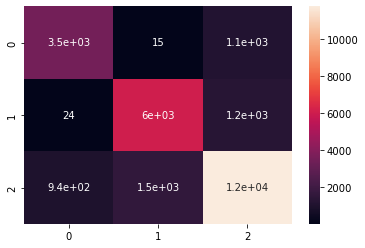

In [174]:
cm_matrix=confusion_matrix(test_y,y_pred)

sns.heatmap(cm_matrix,annot=True)

In [175]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

        Good       0.78      0.76      0.77      4585
        Poor       0.79      0.83      0.81      7281
    Standard       0.84      0.83      0.83     14239

    accuracy                           0.81     26105
   macro avg       0.80      0.80      0.80     26105
weighted avg       0.82      0.81      0.81     26105



---

In [176]:
train_y = train_y.map({'Good': 2, 'Standard': 1, 'Poor': 0 }) #converting to int
train_y

39853    1
31136    1
52697    1
79870    1
35662    1
        ..
47644    2
25103    0
9842     0
69769    0
64750    2
Name: Credit_Score, Length: 60911, dtype: int64

In [177]:
test_y = test_y.map({'Good': 2, 'Standard': 1, 'Poor': 0 }) #converting to int
test_y

56548    2
40664    1
49811    1
20904    0
71140    0
        ..
18201    1
86583    1
71860    2
48433    0
20748    1
Name: Credit_Score, Length: 26105, dtype: int64

In [180]:
test_y.value_counts()

1    14239
0     7281
2     4585
Name: Credit_Score, dtype: int64

In [181]:
train_y.value_counts()

1    32977
0    17096
2    10838
Name: Credit_Score, dtype: int64

> # Xgboost

In [196]:
model = XGBClassifier(max_depth=15,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

model.fit(train_x, train_y)
y_predict = model.predict(test_x)
print('Accuracy Score is {:.5}'.format(accuracy_score(test_y, y_predict)))


Accuracy Score is 0.80655


<AxesSubplot:>

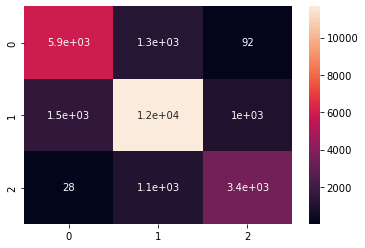

In [197]:
cm_matrix=confusion_matrix(test_y,y_predict)

sns.heatmap(cm_matrix,annot=True)

In [198]:
print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      7281
           1       0.83      0.82      0.83     14239
           2       0.76      0.75      0.75      4585

    accuracy                           0.81     26105
   macro avg       0.79      0.80      0.79     26105
weighted avg       0.81      0.81      0.81     26105



---
---
---